<a href="https://colab.research.google.com/github/zainebch23/Inventory/blob/main/Climate_Change_DATA390_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Zaineb Chaudhry - Final Results Draft**

In [ ]:
import csv
import pandas as pd

import os

import nltk
nltk.download('stopwords')
from nltk.probability import FreqDist
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk import word_tokenize
import matplotlib.pyplot as plt

import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls /content/drive/MyDrive/the-reddit-climate-change-dataset-comments.csv

/content/drive/MyDrive/the-reddit-climate-change-dataset-comments.csv


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/the-reddit-climate-change-dataset-comments.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

stopwords = nlp.Defaults.stop_words
len(stopwords)
nlp.Defaults.stop_words -= {"no", "not"}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print("Column names in the dataset:", df.columns)

Column names in the dataset: Index(['type', 'id', 'subreddit.id', 'subreddit.name', 'subreddit.nsfw',
       'created_utc', 'permalink', 'body', 'sentiment', 'score'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def preprocess_tokenize(comment):
    doc = nlp(comment)
    processed_words_list = []
    for token in doc:
        processed_token = token.lemma_.strip().lower()
        if (len(processed_token) > 1 and
            processed_token.isalpha() and
            not token.is_punct and
            not token.like_url and
            not token.is_stop and
            not token.like_num):
            processed_words_list.append(processed_token)

    return processed_words_list

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Cleaned Texts: 0    example sentence note punctuation filter
Name: cleaned_texts, dtype: object
Filtered tokens with nltk: ['example', 'sentence', 'note', 'punctuation', 'filter']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from collections import Counter
word_counts = Counter(filtered_tokens)
print("Word frequencies:", word_counts)


Word frequencies: Counter({'example': 1, 'sentence': 1, 'note': 1, 'punctuation': 1, 'filter': 1})


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def clean_and_join_tokens(tokens):
    return ' '.join([token for token in tokens if len(token) > 2])

comments_df['cleaned_texts'] = comments_df['tokenized_texts'].apply(clean_and_join_tokens)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import re
comments_df['cleaned_texts'] = comments_df['cleaned_texts'].apply(lambda x: re.sub(r'\b[a-zA-Z]\b', '', x))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd
import gensim
from gensim.models.phrases import Phrases, Phraser

tokens_list = comments_df['tokenized_texts'].tolist()
bigram = Phrases(tokens_list, min_count=5, threshold=100)
trigram = Phrases(bigram[tokens_list], threshold=100)
bigram_mod = Phraser(bigram)
trigram_mod = Phraser(trigram)

for tokens in tokens_list[:5]:
    print("Original:", tokens)
    print("Bigrams:", bigram_mod[tokens])
    print("Trigrams:", trigram_mod[bigram_mod[tokens]])
    print()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Original: ['yeah', 'commenter', 'say', 'base', 'want', 'detest', 'thing', 'small', 'gradual', 'change', 'invest', 'nuclear', 'energy', 'tacit', 'acknowledgement', 'man', 'climate', 'change', 'acknowledgement', 'concession', 'primarie', 'minute']
Bigrams: ['yeah', 'commenter', 'say', 'base', 'want', 'detest', 'thing', 'small', 'gradual', 'change', 'invest', 'nuclear', 'energy', 'tacit', 'acknowledgement', 'man', 'climate', 'change', 'acknowledgement', 'concession', 'primarie', 'minute']
Trigrams: ['yeah', 'commenter', 'say', 'base', 'want', 'detest', 'thing', 'small', 'gradual', 'change', 'invest', 'nuclear', 'energy', 'tacit', 'acknowledgement', 'man', 'climate', 'change', 'acknowledgement', 'concession', 'primarie', 'minute']

Original: ['comparison', 'efficiency', 'solar', 'fossil', 'fuel', 'nonsensical', 'well', 'intentionally', 'mislead', 'bad', 'no', 'universe', 'light', '-&gt', 'photovoltaic', 'cell', '-&gt', 'electricity', 'efficient', 'light', '-&gt', 'entire', 'food', 'chain',

In [ ]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for doc in texts:
        joined = nlp(" ".join(doc))
        texts_out.append([token.lemma_ for token in joined if token.pos_ in allowed_postags])
    return texts_out

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!pip install scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer
documents = [
    "Climate change is affecting the polar bears.",
    "Weather patterns are changing due to climate change.",
    "Polar bears struggle with the changing ice levels."
]
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents)
print(tfidf_matrix.shape)
print(vectorizer.get_feature_names_out())

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform([' '.join(filtered_tokens)])

print(tfidf_matrix.shape)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(3, 17)
['affecting' 'are' 'bears' 'change' 'changing' 'climate' 'due' 'ice' 'is'
 'levels' 'patterns' 'polar' 'struggle' 'the' 'to' 'weather' 'with']
(1, 5)


In [ ]:
# Display some processed comments to verify cleanliness
print(comments_df['cleaned_texts'].head())


0    yeah commenter say base want detest thing smal...
1    comparison efficiency solar fossil fuel nonsen...
2    honestly wait climate change impact kick fucki...
3    not sacramento actually happen world climate c...
4    think climate change tend people rile debate c...
Name: cleaned_texts, dtype: object


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from gensim import corpora, models

# Tokenize cleaned text for LDA
dictionary = corpora.Dictionary(comments_df['cleaned_texts'].str.split())
corpus = [dictionary.doc2bow(text.split()) for text in comments_df['cleaned_texts']]

# Build the LDA model
lda_model = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, random_state=100, update_every=1, chunksize=100, passes=10)

# Use visualization tools like pyLDAvis to view the topics
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

pyLDAvis.enable_notebook()
lda_viz = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_viz)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic 0: Renewable Energy and Climate Change - based on terms, energy, water, power, nuclear, emission, carbon, fuel, gas

Topic 1: Public Discourse on Climate Change - based on terms, people, think, good, know, bad, problem, life, believe, issue

Topic 2: Infrastructure and Climate Change - based on terms, building, house, information, service, health, housing, invest

Topic 3: Environmental Focus on Climate Change - based on terms, carbon, reduice, population, affect, save, risk, environmental, drough, collapse, impact

Topic 4: Global Warming - based on terms, ocean, cool, warm, planetic, scientific, ice, cause, heat, animal, warming, temperature, weather, water

Topic 5: Politics and Climate Change - based on terms, political, government, policy, party, trump, repulican, education, win

Topic 6: International Community and Global Emissions: - based on terms, power, nuclear, fuel, gas, cost, economy, country, europe, need, russia, waste

Topic 7: Socialist Views on Climate Change - based on terms, bernie, student, management, healthcare, crisis, loan, valuable, national, security

Topic 8: Gentrification and Climate Change - based on terms, pay, worker, common, minimum, factory, eliminate, proposal

Topic 9: Climate Justice and Social Media - based on terms, movement, justice, twitter, suffering, pain

Topic 10: Private Economy Impact on Climate Change - based on terms, private, flood, jet, nations, correlation, prison, prone

In [ ]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.032*"climate" + 0.026*"change" + 0.018*"year" + 0.018*"water" + 0.012*"global" + 0.007*"weather" + 0.007*"temperature" + 0.007*"warming" + 0.006*"cause" + 0.006*"earth"
Topic: 1 
Words: 0.013*"energy" + 0.010*"power" + 0.008*"government" + 0.008*"emission" + 0.008*"country" + 0.008*"cost" + 0.007*"need" + 0.007*"carbon" + 0.007*"fuel" + 0.006*"gas"
Topic: 2 
Words: 0.012*"party" + 0.010*"vote" + 0.008*"political" + 0.007*"right" + 0.007*"election" + 0.007*"social" + 0.007*"say" + 0.007*"woman" + 0.006*"state" + 0.006*"amp"
Topic: 3 
Words: 0.045*"change" + 0.044*"climate" + 0.030*"not" + 0.021*"people" + 0.016*"like" + 0.011*"think" + 0.009*"thing" + 0.008*"time" + 0.008*"know" + 0.007*"good"
Topic: 4 
Words: 0.020*"eat" + 0.015*"day" + 0.015*"comment" + 0.013*"god" + 0.012*"meat" + 0.012*"consumer" + 0.011*"common" + 0.009*"billionaire" + 0.009*"religion" + 0.008*"farmer"


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Sentiment Analysis

comments_df["body"].apply(lambda body: TextBlob(body).sentiment.subjectivity)

comments_df["Subjectivity"] = comments_df["body"].apply(lambda body: TextBlob(body).sentiment.subjectivity)

comments_df["Polarity"] = comments_df["body"].apply(lambda body: TextBlob(body).sentiment.polarity)
comments_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,body,sentiment,score,tokenized_texts,cleaned_texts,Subjectivity,Polarity
0,comment,imlddn9,2qh3l,news,False,1661990368,https://old.reddit.com/r/news/comments/x2cszk/...,Yeah but what the above commenter is saying is...,0.5719,2,"[yeah, commenter, say, base, want, detest, thi...",yeah commenter say base want detest thing smal...,0.500000,-0.350000
1,comment,imldbeh,2qn7b,ohio,False,1661990340,https://old.reddit.com/r/Ohio/comments/x2awnp/...,Any comparison of efficiency between solar and...,-0.9877,2,"[comparison, efficiency, solar, fossil, fuel, ...",comparison efficiency solar fossil fuel nonsen...,0.510997,0.000900
2,comment,imldado,2qhma,newzealand,False,1661990327,https://old.reddit.com/r/newzealand/comments/x...,I'm honestly waiting for climate change and th...,-0.1143,1,"[honestly, wait, climate, change, impact, kick...",honestly wait climate change impact kick fucki...,0.530208,0.013542
3,comment,imld6cb,2qi09,sacramento,False,1661990278,https://old.reddit.com/r/Sacramento/comments/x...,Not just Sacramento. It's actually happening a...,0.0000,4,"[not, sacramento, actually, happen, world, cli...",not sacramento actually happen world climate c...,0.200000,0.100000
4,comment,imld0kj,2qh1i,askreddit,False,1661990206,https://old.reddit.com/r/AskReddit/comments/x2...,I think climate change tends to get some peopl...,0.6634,1,"[think, climate, change, tend, people, rile, ,...",think climate change tend people rile debate c...,0.461905,0.319048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23495,comment,ilekr96,2qhp5,neworleans,False,1661220998,https://old.reddit.com/r/NewOrleans/comments/w...,-City wide Pre-k\n\n\n-Boost to land trusts to...,0.9169,0,"[-city, wide, pre, k, , -boost, land, trust, p...",-city wide pre -boost land trust promote affor...,0.460000,-0.060000
23496,comment,ilekplt,2xxyj,damnthatsinteresting,False,1661220977,https://old.reddit.com/r/Damnthatsinteresting/...,"Science in general. Plus Dr, Spoc said we were...",0.0000,1,"[science, general, plus, dr, spoc, say, suppos...",science general plus spoc say suppose ice prog...,0.258333,0.020833
23497,comment,ilekp4p,3gdh7,natureisfuckinglit,False,1661220970,https://old.reddit.com/r/NatureIsFuckingLit/co...,https://www.weather.gov/pbz/floods\n\nLemme gu...,-0.4767,1,"[, lemme, guess, climate, change, fake, earth,...",lemme guess climate change fake earth 6000 yea...,0.600000,-0.200000
23498,comment,ilekkv9,3gdh7,natureisfuckinglit,False,1661220917,https://old.reddit.com/r/NatureIsFuckingLit/co...,Thoughts and prayers. Good thing climate chang...,-0.0772,1,"[thought, prayer, good, thing, climate, change...",thought prayer good thing climate change real ...,0.450000,0.450000


In [ ]:
scores_df = comments_df[['Subjectivity', 'Polarity']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
scores_df.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Subjectivity,Polarity
count,23500.000000,23500.000000
mean,0.445725,0.062885
std,0.207234,0.195397
min,0.000000,-1.000000
25%,0.354940,-0.010858
50%,0.466667,0.054159
75%,0.560425,0.160013
max,1.000000,1.000000


**Mean:**

Subjectivity score is 0.445725 - moderate level of subjectivity.

Polarity score is 0.062885 - overall sentiment is close to neutral, but still positive.

**Standard Deviation:**

Subjectivity: 0.207234

Polarity: it is 0.195397

Both show a moderate spread around the mean -- dataset shows some variation, but is not extremely skewed.

**Minimum:**

Subjectivity: Lowest score is 0 -- objective posts.

Polarity: Lowest  score is -1, -- there was one post with a likely high negative sentiment.

**Maximum:**

Subjectivity: Highest score is 1 - a post that was entirely subjective is likely present in the data

Polarity: Highest score is 1 - a post that had a very high sentiment score was present in the data.

**Interpretation:**

Subjectivity: Average is moderate, which shows us that the reddit posts are a good mix of factual content and public opinion.

Polarity: Average is slightly above neutral, with some very negative posts having a pull on the score, along with very positive ones. There is a good mix and a wide range of sentiments across the Reddit posts.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[<Axes: title={'center': 'Subjectivity'}>,
        <Axes: title={'center': 'Polarity'}>]], dtype=object)

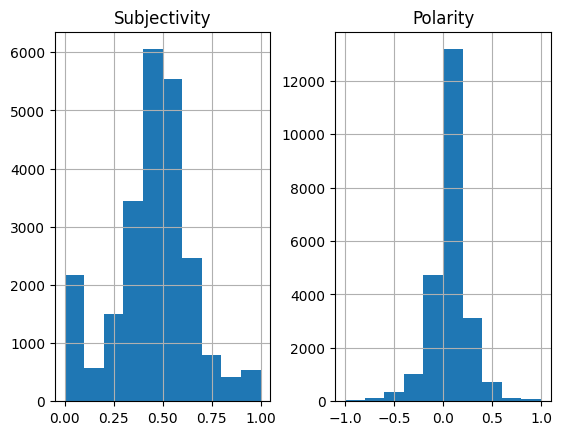

In [ ]:
scores_df.hist()

In [ ]:
sentiment_df = comments_df[['sentiment']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[<Axes: title={'center': 'sentiment'}>]], dtype=object)

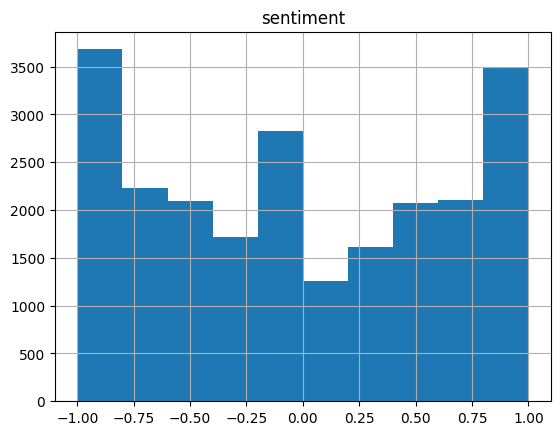

In [ ]:
sentiment_df.hist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


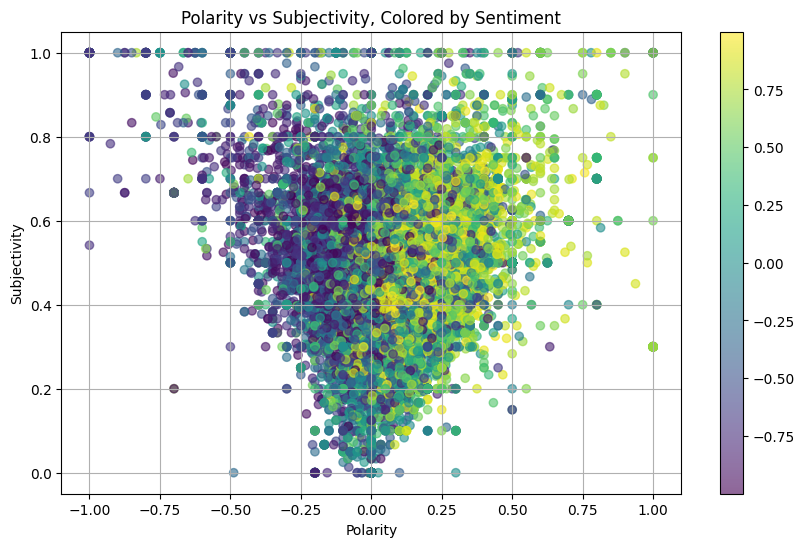

In [ ]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(comments_df['Polarity'], comments_df['Subjectivity'], c=comments_df['sentiment'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter)
plt.title('Polarity vs Subjectivity, Colored by Sentiment')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.grid(True)
plt.show()

In [ ]:
topics = [max(lda_model[doc], key=lambda x: x[1])[0] for doc in corpus]
comments_df['Topic'] = topics  # Assign topics to the correct DataFrame subset

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.loc[:23499, 'Topic'] = topics  # Make sure the index aligns with the number of topics

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(len(topics))
print(len(comments_df))
print(df.shape)

23500
23500
(4600698, 11)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
topic_scores = df.groupby('Topic')['score'].mean().reset_index()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def get_topic_names(lda_model, num_terms=3):
    topic_names = {}
    for i in range(lda_model.num_topics):
        terms = lda_model.show_topic(i, num_terms)
        topic_names[i] = 'Topic ' + str(i+1) + ': ' + ', '.join([term[0] for term in terms])
    return topic_names

topic_names = get_topic_names(lda_model)

topic_scores['Topic'] = topic_scores['Topic'].map(topic_names)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
topics = [max(lda_model[doc], key=lambda x: x[1])[0] for doc in corpus]
comments_df['Topic'] = topics
topic_scores = comments_df.groupby('Topic')['score'].mean().reset_index()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


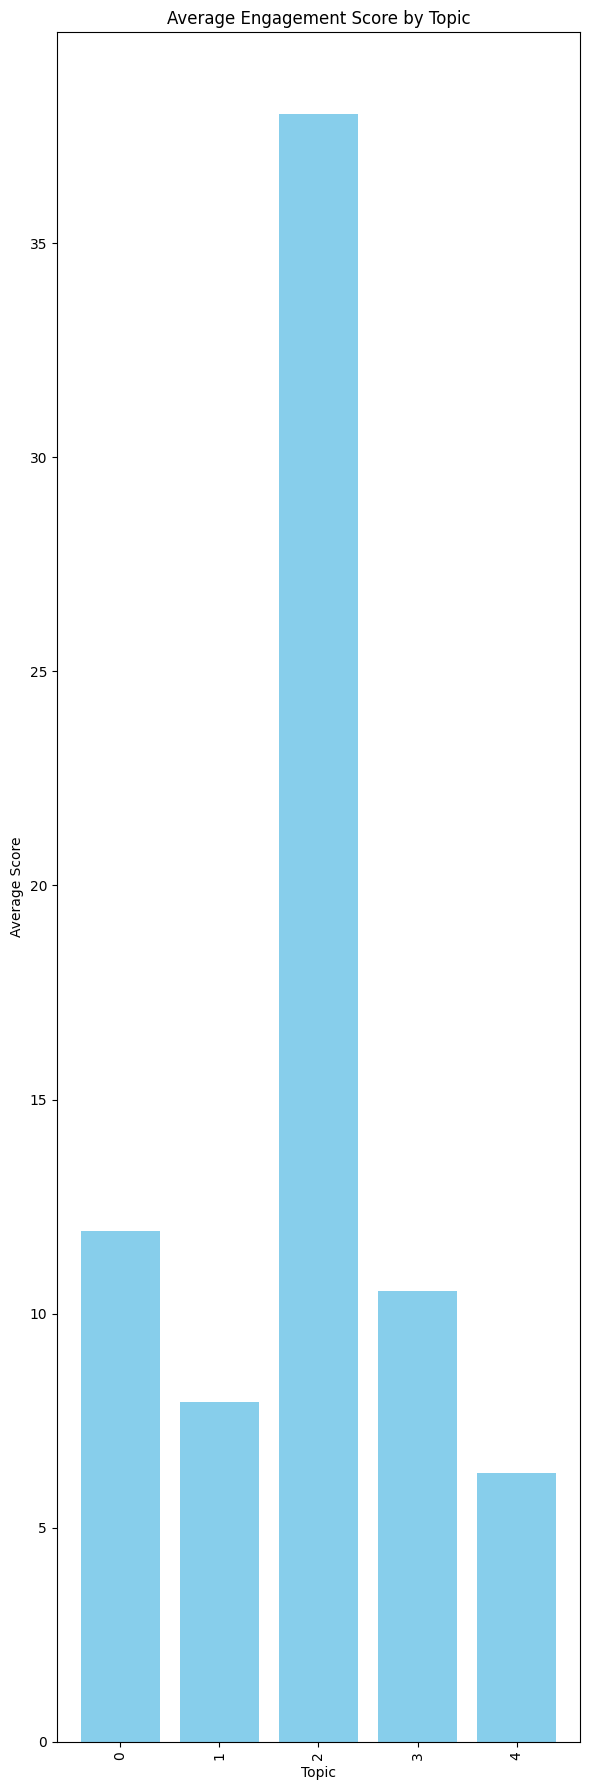

In [ ]:
plt.figure(figsize=(6, 18))
plt.bar(topic_scores['Topic'], topic_scores['score'], color='skyblue')
plt.xlabel('Topic')
plt.ylabel('Average Score')
plt.title('Average Engagement Score by Topic')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
topic_stats = comments_df.groupby('Topic')['score'].agg(['mean', 'std', 'count']).reset_index()
print(topic_stats)

   Topic       mean         std  count
0      0  11.932053  140.937289   2708
1      1   7.935513   45.135999   2233
2      2  38.022989  315.913604    435
3      3  10.540426  125.321402  17971
4      4   6.281046   18.499096    153


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
model = ols('score ~ C(Topic)', data=comments_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                sum_sq       df         F    PR(>F)
C(Topic)  3.480791e+05      4.0  5.325545  0.000277
Residual  3.839100e+08  23495.0       NaN       NaN


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


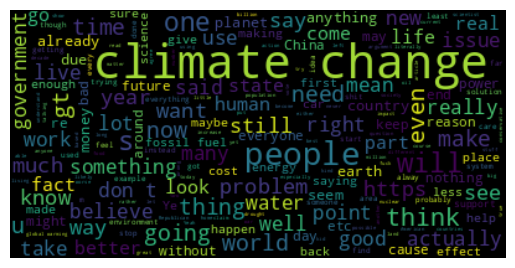

In [ ]:
text1 = " ".join(comment for comment in comments_df['body'])

wordcloud = WordCloud().generate(text1)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('Climate Change DATA390.ipynb', notebookpath='/content/drive/MyDrive/Colab Notebooks/')


File ‘colab_pdf.py’ already there; not retrieving.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ValueError: file 'Climate Change DATA390.ipynb' not found in path '/content/drive/MyDrive/Colab Notebooks/'.

In [ ]:
topics = [max(lda_model[doc], key=lambda x: x[1])[0] for doc in corpus]
df['Topic'] = topics

In [ ]:
# Group by the 'Topic' column and calculate the mean of the 'score' column
topic_scores = df.groupby('Topic')['score'].mean().reset_index()


KeyError: 'Topic'

In [ ]:
# Group by the 'Topic' column and calculate the mean of the 'score' column
topic_scores = df.groupby('Topic')['score'].mean().reset_index()


In [ ]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(topic_scores['Topic'], topic_scores['score'], color='skyblue')
plt.xlabel('Topic')
plt.ylabel('Average Score')
plt.title('Average Engagement Score by Topic')
plt.xticks(rotation=90)  # Rotate labels to improve readability
plt.show()


In [ ]:
topic_stats = df.groupby('Topic')['score'].agg(['mean', 'std', 'count']).reset_index()
